In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# squal quary to get data from sqlite database:
sqlite_file = '/home/vincent/sherlock/corporadb/testDB.db'
conn = sqlite3.connect(sqlite_file)
#table_name = 'email'
#column_2 = 'subject'
#c.execute('SELECT cn FROM {tn} '.\
#        format(tn=table_name,cn=column_2))
#all_rows = c.fetchall()
conn.close()

## Popular words per topic

In [2]:
# create dummy data
Ntopics = 5
Ntopwords = 6
woto = pd.DataFrame(data=np.random.rand(10,5),    # values
        index=['a','b','c','d','e','f','g','h','i','j'],    # 1st column as index
        columns=range(Ntopics))

In [3]:
woto

,0,1,2,3,4
a,0.389659,0.857517,0.439069,0.115568,0.700783
b,0.184241,0.171319,0.898882,0.170198,0.218503
c,0.531959,0.358786,0.249923,0.289445,0.025495
d,0.415037,0.973783,0.517403,0.415568,0.025380
e,0.578243,0.085453,0.041352,0.822633,0.172811
f,0.375271,0.271020,0.525210,0.026524,0.161932
g,0.201246,0.104691,0.260810,0.121093,0.550963
h,0.426952,0.038267,0.905881,0.198720,0.592777
i,0.709415,0.546189,0.886088,0.755526,0.139940
j,0.121015,0.853539,0.611583,0.470609,0.721849


In [8]:
# print a maximum of 6 most popular words per topic that contribute at least 5% to a topic
for i in range(Ntopics):
    topwords = woto.loc[woto.loc[:,i]>0.05,i].sort_values(ascending=False)[0:Ntopwords]
    topwordsprobs = ['%.1f' % element for element in list(topwords.values)]
    print('topic ' + str(i) + ' ' + str(list(zip(list(topwords.index),topwordsprobs))))

topic 0 [('i', '0.7'), ('e', '0.6'), ('c', '0.5'), ('h', '0.4'), ('d', '0.4'), ('a', '0.4')]
topic 1 [('d', '1.0'), ('a', '0.9'), ('j', '0.9'), ('i', '0.5'), ('c', '0.4'), ('f', '0.3')]
topic 2 [('h', '0.9'), ('b', '0.9'), ('i', '0.9'), ('j', '0.6'), ('f', '0.5'), ('d', '0.5')]
topic 3 [('e', '0.8'), ('i', '0.8'), ('j', '0.5'), ('d', '0.4'), ('c', '0.3'), ('h', '0.2')]
topic 4 [('j', '0.7'), ('a', '0.7'), ('h', '0.6'), ('g', '0.6'), ('b', '0.2'), ('e', '0.2')]


In [9]:
topwordspropcontr = topwords.cumsum() / sum(topwords)

In [10]:
list(topwordspropcontr.values)


[0.2440585658327982,
 0.48099470296495217,
 0.68141398919576346,
 0.86769592151148878,
 0.94157220403884623,
 1.0]

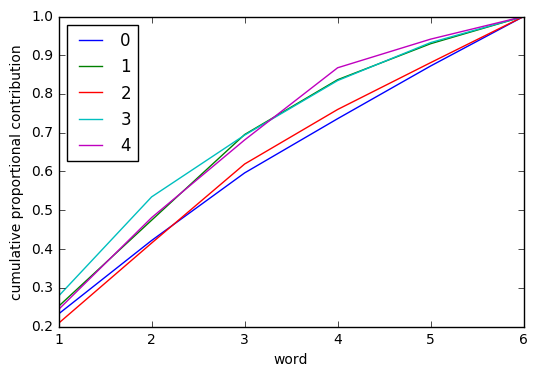

In [23]:
# plot probabilty by word...
plt.figure()
for i in range(Ntopics):
    topwords = woto.loc[woto.loc[:,i]>0.05,i].sort_values(ascending=False)[0:Ntopwords]
    topwordsprobs = ['%.1f' % element for element in list(topwords.values)]
    topwordspropcontr = topwords.cumsum() / sum(topwords)
    plt.plot(range(1,len(list(topwordspropcontr.values))+1),list(topwordspropcontr.values),label=i)
plt.legend(loc='best')
plt.ylabel('cumulative proportional contribution')
plt.xlabel('word')

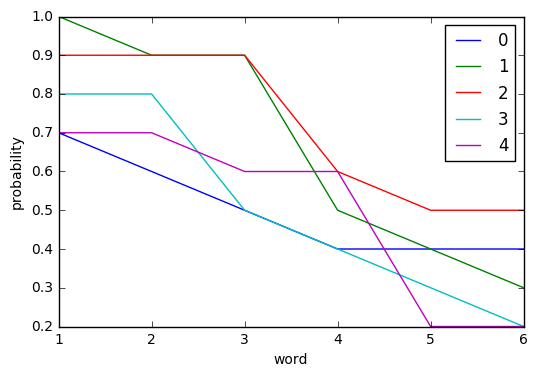

In [21]:
plt.figure()
for i in range(Ntopics):
    topwords = woto.loc[woto.loc[:,i]>0.05,i].sort_values(ascending=False)[0:Ntopwords]
    topwordsprobs = ['%.1f' % element for element in list(topwords.values)]
    plt.plot(range(1,len(topwordsprobs)+1),topwordsprobs,label=i)
plt.legend(loc='best')
plt.ylabel('probability')
plt.xlabel('word')

In [ ]:
proportional_contr.values

In [ ]:
highvalues = np.where(proportional_contr > 0.7)

In [ ]:
?np.where

## Topics over time

In [ ]:
# create dummy data
dates = pd.date_range('1/1/2015', periods=12, freq='M')
timeto = pd.DataFrame(data=np.random.rand(12,5),    # values
        index=dates,    # 1st column as index
        columns=range(Ntopics))

In [ ]:
plt.figure()
timeto.plot(subplots=True,figsize=(9,6),ylim=(0,1))
plt.legend(loc='best')
plt.ylabel('contribution')
plt.xlabel('time')

In [ ]:
#lineObject = plt.plot(timeto,label=timeto.columns.values)
#plt.legend(iter(lineObject))
#plt.ylabel('contribution')
#plt.xlabel('time')
#plt.xticks(rotation=70)
#plt.legend(bbox_to_anchor=(1.05, 1),loc=9,borderaxespad=0.) # 
#plt.show()